In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,74,84,94,110,110,120,170,174,237,273
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,123,146,174,186,197,212,223,243,259,277
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,264,302,367,409,454,511,584,716,847,986
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,164,188,224,267,308,334,370,376,390,428
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,3,3,4,4,5,7,7,7,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,NaN,Botswana,-22.328500,24.684900,0,0,0,0,0,0,...,0,0,0,0,0,0,3,4,4,4
254,NaN,Burundi,-3.373100,29.918900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,3
255,NaN,Sierra Leone,8.460555,-11.779889,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,2
256,"Bonaire, Sint Eustatius and Saba",Netherlands,12.178400,-68.238500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [5]:
data = df.iloc[:,1:75]
data

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,...,40,74,84,94,110,110,120,170,174,237
1,Albania,41.153300,20.168300,0,0,0,0,0,0,0,...,104,123,146,174,186,197,212,223,243,259
2,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,...,230,264,302,367,409,454,511,584,716,847
3,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,...,133,164,188,224,267,308,334,370,376,390
4,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,...,3,3,3,4,4,5,7,7,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Botswana,-22.328500,24.684900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,4,4
254,Burundi,-3.373100,29.918900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
255,Sierra Leone,8.460555,-11.779889,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
256,Netherlands,12.178400,-68.238500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## ITALY

In [7]:
Italy = pd.DataFrame(data.iloc[137,4:73])
Italy.columns = ['Confirmed']
Italy['Days'] = range(1,70)
Italy

,Confirmed,Days
1/23/20,0,1
1/24/20,0,2
1/25/20,0,3
1/26/20,0,4
1/27/20,0,5
...,...,...
3/27/20,86498,65
3/28/20,92472,66
3/29/20,97689,67
3/30/20,101739,68


## Plot

<function matplotlib.pyplot.show(*args, **kw)>

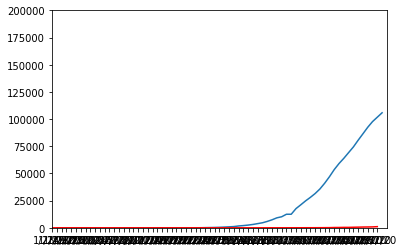

In [22]:
plt.plot(Italy['Days'],Italy['Confirmed'])
plt.plot(Arg['Confirmed'],c='red')
plt.xlim(0,70)
plt.ylim(0,200000)
plt.show

In [ ]:
##Italy_reg = Italy.copy()
##Italy_reg['LogInfections'] = np.log(Italy.Confirmed)
##Italy_reg

## Logistic Regression

In [9]:
Italy['y'] = [1 if x > 1 else 0 for x in Italy['Confirmed']]
Italy

,Confirmed,Days,y
1/23/20,0,1,0
1/24/20,0,2,0
1/25/20,0,3,0
1/26/20,0,4,0
1/27/20,0,5,0
...,...,...,...
3/27/20,86498,65,1
3/28/20,92472,66,1
3/29/20,97689,67,1
3/30/20,101739,68,1


In [11]:
y = Italy['y']
x1 = Italy['Days']

In [13]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

# Get the regression summary
results_log.summary()

         Current function value: 0.000000
         Iterations: 35


/Users/maitu/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   69
Model:                          Logit   Df Residuals:                       67
Method:                           MLE   Df Model:                            1
Date:                Fri, 03 Apr 2020   Pseudo R-squ.:                   1.000
Time:                        13:20:50   Log-Likelihood:            -2.2801e-05
converged:                      False   LL-Null:                       -24.755
Covariance Type:            nonrobust   LLR p-value:                 1.975e-12
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -205.9750   7661.423     -0.027      0.979   -1.52e+04    1.48e+04
Days          24.4042    951.246      0.026      0.980   -1840.004    1888.813
==============================================================================

Complete Separation: The results show that there iscomplete separation.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

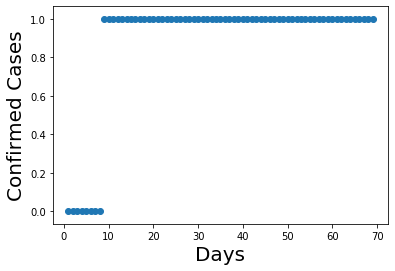

In [18]:
plt.scatter(x1,y,color = 'C0')
plt.xlabel('Days', fontsize = 20)
plt.ylabel('Confirmed Cases', fontsize = 20)
plt.show()

In [19]:
reg_log.predict(60)

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.

## Argentina

In [20]:
Arg = pd.DataFrame(data.iloc[6,4:73])
Arg.columns = ['Confirmed']
Arg

,Confirmed
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0
1/27/20,0
...,...
3/27/20,589
3/28/20,690
3/29/20,745
3/30/20,820


In [21]:
China = pd.DataFrame(data.iloc[55,0:73])
China.columns = ['Confirmed']
China

,Confirmed
Country/Region,China
Lat,23.8298
Long,108.788
1/22/20,2
1/23/20,5
...,...
3/27/20,254
3/28/20,254
3/29/20,254
3/30/20,254
